# Data wrangling WeRateDogs

##### By Himanshu Sharma
##### Analyst, WNS Global Services
##### +91-9780032124

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import csv

## Gathering Data

> ###  Reading the twitter archive

In [2]:
#reading the "twitter-archive-enhanced.csv" file in tae_df
tae_df=pd.read_csv('twitter-archive-enhanced.csv')
tae_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> ###  Downloading the Predictive neural network 

In [3]:
#programmably downloading the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
nn = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(nn.content)

> ## Reading the neural network

In [4]:
#reading the tsv file using the tab separator
ip_df = pd.read_csv('image-predictions.tsv', sep='\t')
ip_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ## Scraping Data using Tweepy

In [3]:
#using the predefined code as suggested by udacity to create the api objects
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

try:
    api = tweepy.API(auth, 
                     parser = tweepy.parsers.JSONParser(),
                     wait_on_rate_limit=True,
                     wait_on_rate_limit_notify=True)
except:
    print("ERROR")

In [113]:
#creating df_list [] where the scarped data will be stored
#df_list = []
#creating errors [] where the errornous or the id's will be stored which we were not able to scrape. 
errors = []
tweet_json=[]
tweets = tae_df['tweet_id']
#idx=0
#storing down the starting time
now = time.time()

with open('tweet_json.txt', 'a+', encoding='utf-8') as file:
    for idx,tweet_id in enumerate(tae_df['tweet_id']):
        try:
            start = time.time()
            tweet = api.get_status(id = tweet_id, tweet_mode='extended')
            file.write(json.dumps(tweet))
            file.write('\n')
            end = time.time()
            print("Reading Tweet {}/{} (Loading {}%) .Time Taken = {}".format((idx+1),len(tweets), round(((idx+1)/len(tweets)) * 100,1), round((end - start),2)))
            
        except Exception as e:
            print(str(tweet_id) + str(e))
            errors.append(tweet_id)
        
file.close()        

then = time.time()
diff = round(then - now)
minutes = diff // 60
seconds = diff % 60
print("Reading Process Completed. Total Time Taken is {}:{}".format(minutes, seconds))    

Reading Tweet 1/2356 (Loading 0.0%) .Time Taken = 1.6
Reading Tweet 2/2356 (Loading 0.1%) .Time Taken = 4.0
Reading Tweet 3/2356 (Loading 0.1%) .Time Taken = 1.07
Reading Tweet 4/2356 (Loading 0.2%) .Time Taken = 4.07
Reading Tweet 5/2356 (Loading 0.2%) .Time Taken = 1.18
Reading Tweet 6/2356 (Loading 0.3%) .Time Taken = 1.08
Reading Tweet 7/2356 (Loading 0.3%) .Time Taken = 1.3
Reading Tweet 8/2356 (Loading 0.3%) .Time Taken = 1.39
Reading Tweet 9/2356 (Loading 0.4%) .Time Taken = 4.08
Reading Tweet 10/2356 (Loading 0.4%) .Time Taken = 1.09
Reading Tweet 11/2356 (Loading 0.5%) .Time Taken = 1.07
Reading Tweet 12/2356 (Loading 0.5%) .Time Taken = 1.57
Reading Tweet 13/2356 (Loading 0.6%) .Time Taken = 1.61
Reading Tweet 14/2356 (Loading 0.6%) .Time Taken = 1.06
Reading Tweet 15/2356 (Loading 0.6%) .Time Taken = 1.09
Reading Tweet 16/2356 (Loading 0.7%) .Time Taken = 1.13
Reading Tweet 17/2356 (Loading 0.7%) .Time Taken = 1.07
Reading Tweet 18/2356 (Loading 0.8%) .Time Taken = 3.99
Read

Reading Tweet 145/2356 (Loading 6.2%) .Time Taken = 1.84
Reading Tweet 146/2356 (Loading 6.2%) .Time Taken = 1.32
Reading Tweet 147/2356 (Loading 6.2%) .Time Taken = 1.13
Reading Tweet 148/2356 (Loading 6.3%) .Time Taken = 1.14
Reading Tweet 149/2356 (Loading 6.3%) .Time Taken = 1.22
Reading Tweet 150/2356 (Loading 6.4%) .Time Taken = 1.16
Reading Tweet 151/2356 (Loading 6.4%) .Time Taken = 1.58
Reading Tweet 152/2356 (Loading 6.5%) .Time Taken = 1.01
Reading Tweet 153/2356 (Loading 6.5%) .Time Taken = 1.05
Reading Tweet 154/2356 (Loading 6.5%) .Time Taken = 1.57
Reading Tweet 155/2356 (Loading 6.6%) .Time Taken = 1.04
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 157/2356 (Loading 6.7%) .Time Taken = 1.62
Reading Tweet 158/2356 (Loading 6.7%) .Time Taken = 1.7
Reading Tweet 159/2356 (Loading 6.7%) .Time Taken = 1.1
Reading Tweet 160/2356 (Loading 6.8%) .Time Taken = 2.63
Reading Tweet 161/2356 (Loading 6.8%) .Time Taken = 1.28
Reading Twee

Reading Tweet 287/2356 (Loading 12.2%) .Time Taken = 1.07
Reading Tweet 288/2356 (Loading 12.2%) .Time Taken = 1.12
Reading Tweet 289/2356 (Loading 12.3%) .Time Taken = 1.5
Reading Tweet 290/2356 (Loading 12.3%) .Time Taken = 1.9
Reading Tweet 291/2356 (Loading 12.4%) .Time Taken = 1.56
Reading Tweet 292/2356 (Loading 12.4%) .Time Taken = 1.03
Reading Tweet 293/2356 (Loading 12.4%) .Time Taken = 1.03
Reading Tweet 294/2356 (Loading 12.5%) .Time Taken = 1.8
Reading Tweet 295/2356 (Loading 12.5%) .Time Taken = 1.08
Reading Tweet 296/2356 (Loading 12.6%) .Time Taken = 2.36
Reading Tweet 297/2356 (Loading 12.6%) .Time Taken = 1.04
Reading Tweet 298/2356 (Loading 12.6%) .Time Taken = 1.68
837012587749474308[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 300/2356 (Loading 12.7%) .Time Taken = 1.58
Reading Tweet 301/2356 (Loading 12.8%) .Time Taken = 2.98
Reading Tweet 302/2356 (Loading 12.8%) .Time Taken = 1.01
Reading Tweet 303/2356 (Loading 12.9%) .Time Taken = 1.

Reading Tweet 420/2356 (Loading 17.8%) .Time Taken = 1.06
Reading Tweet 421/2356 (Loading 17.9%) .Time Taken = 1.12
Reading Tweet 422/2356 (Loading 17.9%) .Time Taken = 1.88
Reading Tweet 423/2356 (Loading 18.0%) .Time Taken = 1.1
Reading Tweet 424/2356 (Loading 18.0%) .Time Taken = 1.08
Reading Tweet 425/2356 (Loading 18.0%) .Time Taken = 1.34
Reading Tweet 426/2356 (Loading 18.1%) .Time Taken = 4.08
Reading Tweet 427/2356 (Loading 18.1%) .Time Taken = 1.14
Reading Tweet 428/2356 (Loading 18.2%) .Time Taken = 1.52
Reading Tweet 429/2356 (Loading 18.2%) .Time Taken = 1.41
Reading Tweet 430/2356 (Loading 18.3%) .Time Taken = 1.06
Reading Tweet 431/2356 (Loading 18.3%) .Time Taken = 1.05
Reading Tweet 432/2356 (Loading 18.3%) .Time Taken = 1.17
Reading Tweet 433/2356 (Loading 18.4%) .Time Taken = 4.33
Reading Tweet 434/2356 (Loading 18.4%) .Time Taken = 3.78
Reading Tweet 435/2356 (Loading 18.5%) .Time Taken = 3.56
Reading Tweet 436/2356 (Loading 18.5%) .Time Taken = 1.42
Reading Tweet 4

Reading Tweet 558/2356 (Loading 23.7%) .Time Taken = 1.03
Reading Tweet 559/2356 (Loading 23.7%) .Time Taken = 1.7
Reading Tweet 560/2356 (Loading 23.8%) .Time Taken = 1.07
Reading Tweet 561/2356 (Loading 23.8%) .Time Taken = 1.09
Reading Tweet 562/2356 (Loading 23.9%) .Time Taken = 1.16
Reading Tweet 563/2356 (Loading 23.9%) .Time Taken = 1.32
Reading Tweet 564/2356 (Loading 23.9%) .Time Taken = 1.09
Reading Tweet 565/2356 (Loading 24.0%) .Time Taken = 1.08
Reading Tweet 566/2356 (Loading 24.0%) .Time Taken = 1.06
802247111496568832[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 568/2356 (Loading 24.1%) .Time Taken = 1.07
Reading Tweet 569/2356 (Loading 24.2%) .Time Taken = 1.07
Reading Tweet 570/2356 (Loading 24.2%) .Time Taken = 1.04
Reading Tweet 571/2356 (Loading 24.2%) .Time Taken = 1.16
Reading Tweet 572/2356 (Loading 24.3%) .Time Taken = 1.08
Reading Tweet 573/2356 (Loading 24.3%) .Time Taken = 1.64
Reading Tweet 574/2356 (Loading 24.4%) .Time Taken = 

Reading Tweet 700/2356 (Loading 29.7%) .Time Taken = 1.08
Reading Tweet 701/2356 (Loading 29.8%) .Time Taken = 1.55
Reading Tweet 702/2356 (Loading 29.8%) .Time Taken = 1.04
Reading Tweet 703/2356 (Loading 29.8%) .Time Taken = 1.31
Reading Tweet 704/2356 (Loading 29.9%) .Time Taken = 1.5
Reading Tweet 705/2356 (Loading 29.9%) .Time Taken = 1.33
Reading Tweet 706/2356 (Loading 30.0%) .Time Taken = 1.06
Reading Tweet 707/2356 (Loading 30.0%) .Time Taken = 1.14
Reading Tweet 708/2356 (Loading 30.1%) .Time Taken = 1.01
Reading Tweet 709/2356 (Loading 30.1%) .Time Taken = 1.06
Reading Tweet 710/2356 (Loading 30.1%) .Time Taken = 1.15
Reading Tweet 711/2356 (Loading 30.2%) .Time Taken = 1.11
Reading Tweet 712/2356 (Loading 30.2%) .Time Taken = 11.42
Reading Tweet 713/2356 (Loading 30.3%) .Time Taken = 1.57
Reading Tweet 714/2356 (Loading 30.3%) .Time Taken = 1.01
Reading Tweet 715/2356 (Loading 30.3%) .Time Taken = 1.05
Reading Tweet 716/2356 (Loading 30.4%) .Time Taken = 3.04
Reading Tweet 

Reading Tweet 833/2356 (Loading 35.4%) .Time Taken = 1.11
Reading Tweet 834/2356 (Loading 35.4%) .Time Taken = 1.12
Reading Tweet 835/2356 (Loading 35.4%) .Time Taken = 1.05
Reading Tweet 836/2356 (Loading 35.5%) .Time Taken = 1.07
Reading Tweet 837/2356 (Loading 35.5%) .Time Taken = 1.13
Reading Tweet 838/2356 (Loading 35.6%) .Time Taken = 1.07
Reading Tweet 839/2356 (Loading 35.6%) .Time Taken = 2.39
Reading Tweet 840/2356 (Loading 35.7%) .Time Taken = 1.05
Reading Tweet 841/2356 (Loading 35.7%) .Time Taken = 1.04
Reading Tweet 842/2356 (Loading 35.7%) .Time Taken = 1.91
Reading Tweet 843/2356 (Loading 35.8%) .Time Taken = 1.06
Reading Tweet 844/2356 (Loading 35.8%) .Time Taken = 1.08
Reading Tweet 845/2356 (Loading 35.9%) .Time Taken = 1.6
Reading Tweet 846/2356 (Loading 35.9%) .Time Taken = 1.19
Reading Tweet 847/2356 (Loading 36.0%) .Time Taken = 1.08
Reading Tweet 848/2356 (Loading 36.0%) .Time Taken = 1.31
Reading Tweet 849/2356 (Loading 36.0%) .Time Taken = 1.08
Reading Tweet 8

Reading Tweet 975/2356 (Loading 41.4%) .Time Taken = 1.14
Reading Tweet 976/2356 (Loading 41.4%) .Time Taken = 1.13
Reading Tweet 977/2356 (Loading 41.5%) .Time Taken = 1.12
Reading Tweet 978/2356 (Loading 41.5%) .Time Taken = 1.13
Reading Tweet 979/2356 (Loading 41.6%) .Time Taken = 1.59
Reading Tweet 980/2356 (Loading 41.6%) .Time Taken = 1.07
Reading Tweet 981/2356 (Loading 41.6%) .Time Taken = 4.6
Reading Tweet 982/2356 (Loading 41.7%) .Time Taken = 1.35
Reading Tweet 983/2356 (Loading 41.7%) .Time Taken = 1.59
Reading Tweet 984/2356 (Loading 41.8%) .Time Taken = 1.11
Reading Tweet 985/2356 (Loading 41.8%) .Time Taken = 1.88
Reading Tweet 986/2356 (Loading 41.9%) .Time Taken = 1.02
Reading Tweet 987/2356 (Loading 41.9%) .Time Taken = 1.03
Reading Tweet 988/2356 (Loading 41.9%) .Time Taken = 1.17
Reading Tweet 989/2356 (Loading 42.0%) .Time Taken = 1.05
Reading Tweet 990/2356 (Loading 42.0%) .Time Taken = 1.09
Reading Tweet 991/2356 (Loading 42.1%) .Time Taken = 1.2
Reading Tweet 99

Reading Tweet 1115/2356 (Loading 47.3%) .Time Taken = 1.1
Reading Tweet 1116/2356 (Loading 47.4%) .Time Taken = 1.05
Reading Tweet 1117/2356 (Loading 47.4%) .Time Taken = 1.11
Reading Tweet 1118/2356 (Loading 47.5%) .Time Taken = 1.07
Reading Tweet 1119/2356 (Loading 47.5%) .Time Taken = 1.09
Reading Tweet 1120/2356 (Loading 47.5%) .Time Taken = 1.73
Reading Tweet 1121/2356 (Loading 47.6%) .Time Taken = 0.99
Reading Tweet 1122/2356 (Loading 47.6%) .Time Taken = 1.02
Reading Tweet 1123/2356 (Loading 47.7%) .Time Taken = 1.07
Reading Tweet 1124/2356 (Loading 47.7%) .Time Taken = 1.04
Reading Tweet 1125/2356 (Loading 47.8%) .Time Taken = 1.03
Reading Tweet 1126/2356 (Loading 47.8%) .Time Taken = 1.18
Reading Tweet 1127/2356 (Loading 47.8%) .Time Taken = 2.0
Reading Tweet 1128/2356 (Loading 47.9%) .Time Taken = 1.04
Reading Tweet 1129/2356 (Loading 47.9%) .Time Taken = 1.11
Reading Tweet 1130/2356 (Loading 48.0%) .Time Taken = 1.0
Reading Tweet 1131/2356 (Loading 48.0%) .Time Taken = 1.01


Reading Tweet 1255/2356 (Loading 53.3%) .Time Taken = 1.12
Reading Tweet 1256/2356 (Loading 53.3%) .Time Taken = 1.03
Reading Tweet 1257/2356 (Loading 53.4%) .Time Taken = 1.05
Reading Tweet 1258/2356 (Loading 53.4%) .Time Taken = 1.06
Reading Tweet 1259/2356 (Loading 53.4%) .Time Taken = 1.05
Reading Tweet 1260/2356 (Loading 53.5%) .Time Taken = 1.07
Reading Tweet 1261/2356 (Loading 53.5%) .Time Taken = 1.35
Reading Tweet 1262/2356 (Loading 53.6%) .Time Taken = 5.45
Reading Tweet 1263/2356 (Loading 53.6%) .Time Taken = 1.1
Reading Tweet 1264/2356 (Loading 53.7%) .Time Taken = 1.06
Reading Tweet 1265/2356 (Loading 53.7%) .Time Taken = 1.06
Reading Tweet 1266/2356 (Loading 53.7%) .Time Taken = 1.03
Reading Tweet 1267/2356 (Loading 53.8%) .Time Taken = 1.06
Reading Tweet 1268/2356 (Loading 53.8%) .Time Taken = 1.82
Reading Tweet 1269/2356 (Loading 53.9%) .Time Taken = 1.56
Reading Tweet 1270/2356 (Loading 53.9%) .Time Taken = 1.06
Reading Tweet 1271/2356 (Loading 53.9%) .Time Taken = 0.9

Reading Tweet 1386/2356 (Loading 58.8%) .Time Taken = 1.05
Reading Tweet 1387/2356 (Loading 58.9%) .Time Taken = 1.14
Reading Tweet 1388/2356 (Loading 58.9%) .Time Taken = 1.0
Reading Tweet 1389/2356 (Loading 59.0%) .Time Taken = 1.34
Reading Tweet 1390/2356 (Loading 59.0%) .Time Taken = 1.0
Reading Tweet 1391/2356 (Loading 59.0%) .Time Taken = 1.1
Reading Tweet 1392/2356 (Loading 59.1%) .Time Taken = 1.06
Reading Tweet 1393/2356 (Loading 59.1%) .Time Taken = 1.18
Reading Tweet 1394/2356 (Loading 59.2%) .Time Taken = 1.23
Reading Tweet 1395/2356 (Loading 59.2%) .Time Taken = 1.03
Reading Tweet 1396/2356 (Loading 59.3%) .Time Taken = 1.09
Reading Tweet 1397/2356 (Loading 59.3%) .Time Taken = 1.06
Reading Tweet 1398/2356 (Loading 59.3%) .Time Taken = 1.22
Reading Tweet 1399/2356 (Loading 59.4%) .Time Taken = 1.08
Reading Tweet 1400/2356 (Loading 59.4%) .Time Taken = 1.08
Reading Tweet 1401/2356 (Loading 59.5%) .Time Taken = 1.06
Reading Tweet 1402/2356 (Loading 59.5%) .Time Taken = 1.0
R

Reading Tweet 1509/2356 (Loading 64.0%) .Time Taken = 1.7
Reading Tweet 1510/2356 (Loading 64.1%) .Time Taken = 1.07
Reading Tweet 1511/2356 (Loading 64.1%) .Time Taken = 1.09
Reading Tweet 1512/2356 (Loading 64.2%) .Time Taken = 1.12
Reading Tweet 1513/2356 (Loading 64.2%) .Time Taken = 1.02
Reading Tweet 1514/2356 (Loading 64.3%) .Time Taken = 1.06
Reading Tweet 1515/2356 (Loading 64.3%) .Time Taken = 1.06
Reading Tweet 1516/2356 (Loading 64.3%) .Time Taken = 1.09
Reading Tweet 1517/2356 (Loading 64.4%) .Time Taken = 1.1
Reading Tweet 1518/2356 (Loading 64.4%) .Time Taken = 1.11
Reading Tweet 1519/2356 (Loading 64.5%) .Time Taken = 1.14
Reading Tweet 1520/2356 (Loading 64.5%) .Time Taken = 1.04
Reading Tweet 1521/2356 (Loading 64.6%) .Time Taken = 1.08
Reading Tweet 1522/2356 (Loading 64.6%) .Time Taken = 1.08
Reading Tweet 1523/2356 (Loading 64.6%) .Time Taken = 1.0
Reading Tweet 1524/2356 (Loading 64.7%) .Time Taken = 1.06
Reading Tweet 1525/2356 (Loading 64.7%) .Time Taken = 1.16


Reading Tweet 1624/2356 (Loading 68.9%) .Time Taken = 1.09
Reading Tweet 1625/2356 (Loading 69.0%) .Time Taken = 1.03
Reading Tweet 1626/2356 (Loading 69.0%) .Time Taken = 1.09
Reading Tweet 1627/2356 (Loading 69.1%) .Time Taken = 1.03
Reading Tweet 1628/2356 (Loading 69.1%) .Time Taken = 1.13
Reading Tweet 1629/2356 (Loading 69.1%) .Time Taken = 1.25
Reading Tweet 1630/2356 (Loading 69.2%) .Time Taken = 1.08
Reading Tweet 1631/2356 (Loading 69.2%) .Time Taken = 1.16
Reading Tweet 1632/2356 (Loading 69.3%) .Time Taken = 1.03
Reading Tweet 1633/2356 (Loading 69.3%) .Time Taken = 1.02
Reading Tweet 1634/2356 (Loading 69.4%) .Time Taken = 1.14
Reading Tweet 1635/2356 (Loading 69.4%) .Time Taken = 1.07
Reading Tweet 1636/2356 (Loading 69.4%) .Time Taken = 1.54
Reading Tweet 1637/2356 (Loading 69.5%) .Time Taken = 1.86
Reading Tweet 1638/2356 (Loading 69.5%) .Time Taken = 1.06
Reading Tweet 1639/2356 (Loading 69.6%) .Time Taken = 0.99
Reading Tweet 1640/2356 (Loading 69.6%) .Time Taken = 1.

Reading Tweet 1764/2356 (Loading 74.9%) .Time Taken = 1.04
Reading Tweet 1765/2356 (Loading 74.9%) .Time Taken = 1.11
Reading Tweet 1766/2356 (Loading 75.0%) .Time Taken = 1.17
Reading Tweet 1767/2356 (Loading 75.0%) .Time Taken = 1.08
Reading Tweet 1768/2356 (Loading 75.0%) .Time Taken = 1.03
Reading Tweet 1769/2356 (Loading 75.1%) .Time Taken = 1.13
Reading Tweet 1770/2356 (Loading 75.1%) .Time Taken = 1.03
Reading Tweet 1771/2356 (Loading 75.2%) .Time Taken = 1.17
Reading Tweet 1772/2356 (Loading 75.2%) .Time Taken = 1.0
Reading Tweet 1773/2356 (Loading 75.3%) .Time Taken = 1.0
Reading Tweet 1774/2356 (Loading 75.3%) .Time Taken = 1.05
Reading Tweet 1775/2356 (Loading 75.3%) .Time Taken = 3.49
Reading Tweet 1776/2356 (Loading 75.4%) .Time Taken = 5.19
Reading Tweet 1777/2356 (Loading 75.4%) .Time Taken = 0.98
Reading Tweet 1778/2356 (Loading 75.5%) .Time Taken = 1.08
Reading Tweet 1779/2356 (Loading 75.5%) .Time Taken = 1.53
Reading Tweet 1780/2356 (Loading 75.6%) .Time Taken = 1.07

Reading Tweet 1904/2356 (Loading 80.8%) .Time Taken = 1.42
Reading Tweet 1905/2356 (Loading 80.9%) .Time Taken = 8.09
Reading Tweet 1906/2356 (Loading 80.9%) .Time Taken = 2.62
Reading Tweet 1907/2356 (Loading 80.9%) .Time Taken = 1.02
Reading Tweet 1908/2356 (Loading 81.0%) .Time Taken = 1.1
Reading Tweet 1909/2356 (Loading 81.0%) .Time Taken = 1.11
Reading Tweet 1910/2356 (Loading 81.1%) .Time Taken = 1.32
Reading Tweet 1911/2356 (Loading 81.1%) .Time Taken = 3.93
Reading Tweet 1912/2356 (Loading 81.2%) .Time Taken = 4.19
Reading Tweet 1913/2356 (Loading 81.2%) .Time Taken = 1.32
Reading Tweet 1914/2356 (Loading 81.2%) .Time Taken = 1.66
Reading Tweet 1915/2356 (Loading 81.3%) .Time Taken = 1.04
Reading Tweet 1916/2356 (Loading 81.3%) .Time Taken = 1.84
Reading Tweet 1917/2356 (Loading 81.4%) .Time Taken = 1.09
Reading Tweet 1918/2356 (Loading 81.4%) .Time Taken = 1.13
Reading Tweet 1919/2356 (Loading 81.5%) .Time Taken = 1.07
Reading Tweet 1920/2356 (Loading 81.5%) .Time Taken = 1.0

Reading Tweet 2044/2356 (Loading 86.8%) .Time Taken = 1.54
Reading Tweet 2045/2356 (Loading 86.8%) .Time Taken = 1.65
Reading Tweet 2046/2356 (Loading 86.8%) .Time Taken = 4.12
Reading Tweet 2047/2356 (Loading 86.9%) .Time Taken = 1.16
Reading Tweet 2048/2356 (Loading 86.9%) .Time Taken = 1.41
Reading Tweet 2049/2356 (Loading 87.0%) .Time Taken = 4.46
Reading Tweet 2050/2356 (Loading 87.0%) .Time Taken = 1.62
Reading Tweet 2051/2356 (Loading 87.1%) .Time Taken = 1.49
Reading Tweet 2052/2356 (Loading 87.1%) .Time Taken = 1.04
Reading Tweet 2053/2356 (Loading 87.1%) .Time Taken = 1.01
Reading Tweet 2054/2356 (Loading 87.2%) .Time Taken = 1.01
Reading Tweet 2055/2356 (Loading 87.2%) .Time Taken = 1.08
Reading Tweet 2056/2356 (Loading 87.3%) .Time Taken = 1.2
Reading Tweet 2057/2356 (Loading 87.3%) .Time Taken = 1.3
Reading Tweet 2058/2356 (Loading 87.4%) .Time Taken = 1.08
Reading Tweet 2059/2356 (Loading 87.4%) .Time Taken = 1.08
Reading Tweet 2060/2356 (Loading 87.4%) .Time Taken = 1.17

Reading Tweet 2184/2356 (Loading 92.7%) .Time Taken = 1.09
Reading Tweet 2185/2356 (Loading 92.7%) .Time Taken = 1.08
Reading Tweet 2186/2356 (Loading 92.8%) .Time Taken = 1.17
Reading Tweet 2187/2356 (Loading 92.8%) .Time Taken = 1.05
Reading Tweet 2188/2356 (Loading 92.9%) .Time Taken = 1.02
Reading Tweet 2189/2356 (Loading 92.9%) .Time Taken = 1.05
Reading Tweet 2190/2356 (Loading 93.0%) .Time Taken = 1.06
Reading Tweet 2191/2356 (Loading 93.0%) .Time Taken = 1.06
Reading Tweet 2192/2356 (Loading 93.0%) .Time Taken = 1.03
Reading Tweet 2193/2356 (Loading 93.1%) .Time Taken = 1.1
Reading Tweet 2194/2356 (Loading 93.1%) .Time Taken = 1.08
Reading Tweet 2195/2356 (Loading 93.2%) .Time Taken = 4.03
Reading Tweet 2196/2356 (Loading 93.2%) .Time Taken = 1.07
Reading Tweet 2197/2356 (Loading 93.3%) .Time Taken = 1.68
Reading Tweet 2198/2356 (Loading 93.3%) .Time Taken = 1.36
Reading Tweet 2199/2356 (Loading 93.3%) .Time Taken = 1.05
Reading Tweet 2200/2356 (Loading 93.4%) .Time Taken = 1.7

Reading Tweet 2324/2356 (Loading 98.6%) .Time Taken = 1.04
Reading Tweet 2325/2356 (Loading 98.7%) .Time Taken = 1.0
Reading Tweet 2326/2356 (Loading 98.7%) .Time Taken = 1.11
Reading Tweet 2327/2356 (Loading 98.8%) .Time Taken = 1.04
Reading Tweet 2328/2356 (Loading 98.8%) .Time Taken = 1.48
Reading Tweet 2329/2356 (Loading 98.9%) .Time Taken = 1.0
Reading Tweet 2330/2356 (Loading 98.9%) .Time Taken = 20.0
Reading Tweet 2331/2356 (Loading 98.9%) .Time Taken = 1.03
Reading Tweet 2332/2356 (Loading 99.0%) .Time Taken = 1.0
Reading Tweet 2333/2356 (Loading 99.0%) .Time Taken = 1.07
Reading Tweet 2334/2356 (Loading 99.1%) .Time Taken = 1.06
Reading Tweet 2335/2356 (Loading 99.1%) .Time Taken = 1.04
Reading Tweet 2336/2356 (Loading 99.2%) .Time Taken = 1.03
Reading Tweet 2337/2356 (Loading 99.2%) .Time Taken = 1.2
Reading Tweet 2338/2356 (Loading 99.2%) .Time Taken = 1.12
Reading Tweet 2339/2356 (Loading 99.3%) .Time Taken = 1.33
Reading Tweet 2340/2356 (Loading 99.3%) .Time Taken = 0.99
R

In [114]:
#Printing the total time taken for the scraping twitter's tweet data using tweepy api
hours=(diff//60)//60
minutes=(diff//60)%60
print("Therefore time taken for scraping the retweet_count and favorite_count took :- \n"+str(hours)+" hours "+str(minutes)+" minutes and "+str(seconds)+" seconds.")

Therefore time taken for scraping the retweet_count and favorite_count took :- 
1 hours 5 minutes and 35 seconds.


In [115]:
#Printing the errornous tweet_id's that we were unabe to scrape
errors

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 825026590719483904,
 816014286006976512,
 802247111496568832,
 780476555013349377,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 702932127499816960,
 693280720173801472,
 693095443459342336,
 689661964914655233,
 689280876073582592,
 685667379192414208]

In [116]:
len(errors)

23

> ### Scraping the errornous id's info

In [117]:
#scraping the id's which we were not able to scrape above.
errors_final=[]
tweets = errors
#storing down the starting time
now = time.time()

with open('tweet_json.txt', 'a+', encoding='utf-8') as file:
    for idx,tweet_id in enumerate(errors):
        try:
            start = time.time()
            tweet = api.get_status(id = tweet_id, tweet_mode='extended')
            file.write(json.dumps(tweet))
            file.write('\n')
            end = time.time()
            print("Reading Tweet {}/{} (Loading {}%) .Time Taken = {}".format((idx+1),len(tweets), round(((idx+1)/len(tweets)) * 100,1), round((end - start),2)))
            
        except Exception as e:
            print(str(tweet_id) + str(e))
            errors_final.append(tweet_id)
        
        

then = time.time()
diff = round(then - now)
minutes = diff // 60
seconds = diff % 60
print("Reading Process Completed. Total Time Taken is {}:{}".format(minutes, seconds))   

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 11/23 (Loading 47.8%) .Time Taken = 1.01
Reading Tweet 12/23 (Loading 52.2%) .Time Taken = 1.51
802247111496568832[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 14/23 (Loading 60.

> ### Final Errors

In [118]:
#printing the id's for which data was not found
errors_final

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368]

In [119]:
print(str(len(errors_final))+" id's were there of which i was not able to scrape the information.")

14 id's were there of which i was not able to scrape the information.


In [120]:
tweet_data = []

with open('tweet_json.txt','r') as json_file:  
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favorite_count = json_data['favorite_count']
        tweet_data.append({'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count),
                        'tweet_id': int(tweet_id)})



scraped_df = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [121]:
scraped_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8366,38196
1,892177421306343426,6177,32747
2,891815181378084864,4089,24658
3,891689557279858688,8503,41516
4,891327558926688256,9207,39716
5,891087950875897856,3064,19934
6,890971913173991426,2029,11662
7,890729181411237888,18566,64454
8,890609185150312448,4205,27392
9,890240255349198849,7266,31434


### Since we can see, it took around 2 hours for the data scraping, it could not be feasible to scrape data every time we load the notebook. So we should save the json data to some files , that we can read and access later.

In [122]:
#converting the data into a dataframe
#scraped_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count']) 
scraped_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8366,38196
1,892177421306343426,6177,32747
2,891815181378084864,4089,24658
3,891689557279858688,8503,41516
4,891327558926688256,9207,39716


In [123]:
#storing the dataframe to a text file
#zzzzzzz#scraped_df.to_csv('scraped_data)

In [124]:
#checking out some basic info
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


We can see there were 2356 id's the dataset provided , but due to overlapping and re-running of the code blocks, it may/may not show the exact numbers, but we will find out and solve the issue in the data assessing and data cleaning section.

> ## Creating a checkpoint !!

>> ### From this checkpoint i am re_reading all the saved data and i will be working on it from here.

In [126]:
#reading the scraped data
scraped_df.to_csv('tweet_json.csv')

In [188]:
#reading the scraped data
scraped_df=pd.read_csv('tweet_json.csv')

In [189]:
#reading the prediction file
ip_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [190]:
#reading the twitter archive
tae_df=pd.read_csv('twitter-archive-enhanced.csv')

> ### Now the data gathering process has been done.

> ## Data assessing

>> ### Visual Assessment

In [191]:
#Assessing the scraped_df 
scraped_df

,Unnamed: 0,tweet_id,retweet_count,favorite_count
0,0,892420643555336193,8366,38196
1,1,892177421306343426,6177,32747
2,2,891815181378084864,4089,24658
3,3,891689557279858688,8503,41516
4,4,891327558926688256,9207,39716
5,5,891087950875897856,3064,19934
6,6,890971913173991426,2029,11662
7,7,890729181411237888,18566,64454
8,8,890609185150312448,4205,27392
9,9,890240255349198849,7266,31434


In [192]:
#assessing the prediction file
ip_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [193]:
#assessing the twiiter archive
tae_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


>> ## Programmatic Assessment

 ### Assessing the twitter archive

In [194]:
#Assessing the twitter archive
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [195]:
#Assessing the twitter archive
tae_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [196]:
#looking for duplicate values
tae_df.duplicated().sum()

0

In [197]:
#checking the data types
tae_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [198]:
#checking the sample
tae_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
2182,668992363537309700,NaN,NaN,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668992363...,8,10,Harrison,None,None,None,None
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,None,None,None,None
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None
1823,676533798876651520,NaN,NaN,2015-12-14 22:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676533798...,12,10,None,None,None,None,None
814,771014301343748096,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
1728,679872969355714560,NaN,NaN,2015-12-24 03:55:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rocco. He's in a very intense game of ...,NaN,NaN,NaN,https://vine.co/v/iAAxTbj1UAM,10,10,Rocco,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None


In [199]:
#checking the denominator values
tae_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [200]:
#checking the names of dogs
tae_df.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Lola            10
Penny           10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
Daisy            7
Toby             7
an               7
Bailey           7
Buddy            7
Milo             6
Oscar            6
Rusty            6
Bella            6
Jack             6
Scout            6
Koda             6
Dave             6
Jax              6
Leo              6
Stanley          6
Louis            5
              ... 
infuriating      1
Corey            1
Kenzie           1
Murphy           1
Jim              1
Kevon            1
Rooney           1
Dante            1
Biden            1
Harvey           1
Jerome           1
Skittles         1
Bonaparte        1
Boots            1
Thor             1
Skye             1
Tiger            1
Ginger           1
Heinrich         1
Combo            1
Cilantro         1
Rambo       

In [201]:
#checking the null values
tae_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

 ### Assessing the prediction file

In [202]:
#assessing the prediction file
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [203]:
#assessing the prediction file
ip_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [204]:
#looking for duplicate values
ip_df.duplicated().sum()

0

In [205]:
#checking the data types
ip_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [206]:
#checking out the sample
ip_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,1,Chihuahua,0.319106,True,whippet,0.169134,True,toy_terrier,0.125815,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.020683,False


In [207]:
#checking the null values
ip_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

 ### Assessing the scraped data

In [208]:
#assessing the scraped data
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
Unnamed: 0        2342 non-null int64
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(4)
memory usage: 73.3 KB


In [209]:
#assessing the scraped data
scraped_df.describe()

,Unnamed: 0,tweet_id,retweet_count,favorite_count
count,2342.000000,2.342000e+03,2342.000000,2342.000000
mean,1170.500000,7.422212e+17,2949.255764,7996.885141
std,676.221487,6.832408e+16,4960.180567,12377.655353
min,0.000000,6.660209e+17,0.000000,0.000000
25%,585.250000,6.783509e+17,591.750000,1382.500000
50%,1170.500000,7.186224e+17,1376.500000,3480.500000
75%,1755.750000,7.986971e+17,3441.250000,9802.000000
max,2341.000000,8.924206e+17,84046.000000,164875.000000


In [210]:
#looking for duplicate values
scraped_df['tweet_id'].duplicated().sum()

0

### checking if we have gathered all the data

In [211]:
#checking the condition ( if true then the we have gathered all the data required , excluding the 14 errornous records)
(len(scraped_df)-scraped_df['tweet_id'].duplicated().sum()+len(errors_final))==len(tae_df)

True

Length of the scraped id's -  duplicate records  + records not able to scraped == length of twitter archive

In [212]:
#checking the data types
scraped_df.dtypes

Unnamed: 0        int64
tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [213]:
#checking the sample
scraped_df.sample(5)

,Unnamed: 0,tweet_id,retweet_count,favorite_count
71,71,878604707211726852,7111,29866
1716,1716,679511351870550016,1366,3539
489,489,813096984823349248,3970,11282
2042,2042,671151324042559489,159,687
1283,1283,707693576495472641,1072,3616


In [214]:
#checking the null values
scraped_df.isnull().sum()

Unnamed: 0        0
tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

> ## Observations :-

>> ### Quality Issues

## Twitter Archive :-
- 1) The data type of tweet_id  should be string since we do not need to perform any calculations on it.
- 2) Timestamp datatype is incorrect
- 3) Denominator of some of the ratings is incorrect,i.e., not on a fixed scale 10.
- 4) Some of the tweets are retweeted with respect to the first.
- 5) Some dogs names are missing or unknown and marked as none.
- 6) There are incorrectdog names such as a,the.
- 7) There are unnecessary columns in the dataset.

## Prediction file :-
- The data type of tweet_id  should be string since we do not need to perform any calculations on it.

## Scraped data :-
- The data type of tweet_id  should be string since we do not need to perform any calculations on it.
- 8) There are 14 tweets which we were not able to read with the following tweet id's:-
 > - 866816280283807744
 > - 888202515573088257
 > - 869988702071779329
 > - 873697596434513921
 > - 872668790621863937
 > - 861769973181624320
 > - 845459076796616705
 > - 842892208864923648
 > - 837012587749474308
 > - 827228250799742977
 > - 802247111496568832
 > - 754011816964026368
 > - 770743923962707968
 > - 775096608509886464

>> ### Tidiness Issues

- 1) There are certain columns defining the breed of the dog, these should be melted to a single column.
- 2) 'Unnamed: 0' column should be removed , as it does not possess any useful info.
- 3) Scraped data and the twitter archive should be merged into one dataset and also the prediction file.

> ## Data cleaning

In [361]:
#making a copy of each dataframe prior to cleaning
tae_final=pd.read_csv('twitter-archive-enhanced.csv')
ip_final=pd.read_csv('image-predictions.tsv', sep='\t')
scraped_final=pd.read_csv('tweet_json.csv')

>> ### Quality Issues

## - Issue 1

### Define
- Changing the data type of the column tweet_id in all the dataframes using the astype function

### Code

In [362]:
#using the astype function to change the datatype of tweet_id in each dataframe
tae_final.tweet_id = tae_final.tweet_id.astype(str)
ip_final.tweet_id = ip_final.tweet_id.astype(str)
scraped_final.tweet_id = scraped_final.tweet_id.astype(str)

### Test

In [363]:
#checking the data type of tweeet_id
tae_final['tweet_id'].dtype

dtype('O')

In [364]:
#checking the data type of tweeet_id
ip_final['tweet_id'].dtype

dtype('O')

In [365]:
#checking the data type of tweeet_id
scraped_final['tweet_id'].dtype

dtype('O')

## - Issue 2

### Define
- Changing the Timestamp datatype to datetime in the twitter archive 

### Code

In [366]:
#changing the datatype using pandas to_datetime function
tae_final['timestamp'] = pd.to_datetime(tae_final['timestamp'])

### Test

In [367]:
#checking the datatype
tae_final['timestamp'].dtype

dtype('<M8[ns]')

## - Issue 3

### Define
- Changing the Denominator to a fixed scale of 10

### It would be feasible to rate dogs on different denominators , and it is also mentioned in the project description that most of the dog ratings are on a scale of 10 denominator.

### Code

In [368]:
#assigning '10' to the rating_denominator column
tae_final['rating_denominator']=10

### Test

In [369]:
#veryfying the column
tae_final['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

## - Issue 4

### Define
- Removing the retweets.

### Code

In [370]:
#using pandas mask feature to select only that part of dataframe where we dont have any data for retweets or replies
tae_final=tae_final[tae_final['retweeted_status_id'].isnull()]
tae_final=tae_final[tae_final['in_reply_to_status_id'].isnull()]

### Test

In [371]:
#veryfying the result
tae_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

## - Issue 5

### Define
- Replacing none with NAN in  dog names

### Code

In [372]:
#replacing the errrornous dog names with null using python's replace function
tae_final['name'].replace('None', np.nan, inplace=True)

### Test

In [373]:
#veryfying the result
tae_final['name'].value_counts()

a             55
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
the            8
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Jax            6
Oscar          6
an             6
Bella          6
Bailey         6
Bo             6
Koda           6
Stanley        6
Scout          5
Dave           5
Leo            5
Rusty          5
Bentley        5
Louis          5
Chester        5
Buddy          5
Milo           5
              ..
Hermione       1
Hamrick        1
Emma           1
Blu            1
Heinrich       1
Biden          1
Davey          1
Ginger         1
Dallas         1
Grizzie        1
Kyro           1
Kane           1
Noosh          1
Mairi          1
Godzilla       1
Bowie          1
Christoper     1
Ralphson       1
Arlo           1
Brudge         1
Mary           1
Rizzy          1
Meyer          1
Skittles       1
Bonaparte      1
Boots          1
Thor           1
Skye          

## - Issue 6

### Define
- Removing the un-necessary columns

### Code

In [374]:
#checking the un-necessary columns
tae_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [375]:
#dropping the in_reply_to_status_id column
tae_final.drop(['in_reply_to_status_id'], axis=1, inplace = True)
#dropping the in_reply_to_user_id column
tae_final.drop(['in_reply_to_user_id'], axis=1, inplace = True)
#dropping the retweeted_status_id column
tae_final.drop(['retweeted_status_id'], axis=1, inplace = True)
#dropping the retweeted_status_user_id column
tae_final.drop(['retweeted_status_user_id'], axis=1, inplace = True)
#dropping the retweeted_status_timestamp column
tae_final.drop(['retweeted_status_timestamp'], axis=1, inplace = True)

### Test

In [376]:
#verifying the result
tae_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


## - Issue 7

### Define
- Removing the errornous dog names.

### Code

In [377]:
#replacing the errrornous dog names with null using python's replace function
tae_final['name'].replace('the', np.nan, inplace=True)
tae_final['name'].replace('a', np.nan, inplace=True)
tae_final['name'].replace('an', np.nan, inplace=True)
tae_final['name'].replace('my', np.nan, inplace=True)
tae_final['name'].replace('by', np.nan, inplace=True)

### Test

In [378]:
#veryfying the result
tae_final['name'].value_counts()

Lucy              11
Charlie           11
Cooper            10
Oliver            10
Penny              9
Tucker             9
Sadie              8
Lola               8
Winston            8
Toby               7
Daisy              7
Stanley            6
Jax                6
Bo                 6
Koda               6
Bailey             6
Oscar              6
Bella              6
Bentley            5
Milo               5
Rusty              5
Buddy              5
Chester            5
Scout              5
Louis              5
Dave               5
Leo                5
one                4
Sammy              4
Maggie             4
                  ..
Nimbus             1
Lorelei            1
Strudel            1
Iroh               1
Mimosa             1
Ralf               1
Charleson          1
Ralph              1
Dale               1
Striker            1
Tycho              1
Remy               1
Holly              1
Schnitzel          1
Perry              1
Tater              1
Rover        

## - Issue 8

### Define
- We should delete the tweets , which we were not able to scrape using api

### Code

In [379]:
#checking the tweet_id's for which we were not able to fetch data.
errors_final

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368]

In [380]:
#deleting the tweets
tae_final = tae_final.loc[~tae_final['tweet_id'].isin(errors_final),:]

### Test

In [381]:
#verifying the result
for i in tae_final['tweet_id']:
    if i in errors_final:
        print (i)

>> ### Tidiness Issues

## - Issue 1

### Define
- Melting the multiple breed names columns into a single column

### Code

In [382]:
#checking the columns that need to be melted
tae_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1423 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [383]:
# Rectifying dog_stage

tae_final['dog_stage'] = 'None'

def get_dog_stage(row):
    
    dog_stage = []
    
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: 
        row['dog_stage'] = 'None'
    else:         
        row['dog_stage'] = '-'.join(dog_stage)
    
    return row

tae_final = tae_final.apply(get_dog_stage, axis=1)

In [239]:
#melting the columns
tae_final = pd.melt(tae_final, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                        'source',
                                                                'text',
                                        'expanded_urls',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dog_stage')


In [388]:
#checking the result
tae_final.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1512,691321916024623104,2016-01-24 18:09:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,https://twitter.com/dog_rates/status/691321916...,11,10,Molly,None,None,None,None,NaN
277,840370681858686976,2017-03-11 01:15:58,"<a href=""http://twitter.com/download/iphone"" r...",You have been visited by the magical sugar jar...,https://twitter.com/dog_rates/status/840370681...,13,10,NaN,None,None,None,None,NaN
1439,696894894812565505,2016-02-09 03:14:25,"<a href=""http://twitter.com/download/iphone"" r...",These two pirates crashed their ship and don't...,https://twitter.com/dog_rates/status/696894894...,9,10,NaN,None,None,None,None,NaN
1151,725842289046749185,2016-04-29 00:21:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Colby. He's currently regretting all t...,https://twitter.com/dog_rates/status/725842289...,12,10,Colby,None,None,None,None,NaN
1705,680836378243002368,2015-12-26 19:43:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She's secretly ferocious. 12/10...,https://twitter.com/dog_rates/status/680836378...,12,10,Ellie,None,None,pupper,None,pupper


In [384]:
#we need to remove the duplicate records so checking them
tae_final['dog_stage'].value_counts()

None             1761
pupper            221
doggo              72
puppo              23
doggo-pupper        9
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [385]:
#removing the dupliate records
tae_final = tae_final.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [386]:
#replacing the unknown breed_names with null
tae_final['dog_stage'].replace('None', np.nan, inplace=True)

In [392]:
#removing the unwanted columns
tae_final.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [393]:
#checking the result
tae_final.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
648,793120401413079041,2016-10-31 16:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,NaN
2022,672068090318987265,2015-12-02 15:01:33,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,NaN
845,766423258543644672,2016-08-18 23:55:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,NaN
1500,692158366030913536,2016-01-27 01:33:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,NaN
136,866334964761202691,2017-05-21 16:48:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN


### Test

In [387]:
#verifying the result
tae_final['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
doggo-pupper       9
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

## - Issue 2

### Define
- Removing the 'Unnamed: 0' column, as it does not possess any useful info.

### Code

In [394]:
#checking the unwanted columns
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
Unnamed: 0        2342 non-null int64
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(4)
memory usage: 73.3 KB


In [395]:
#removing the unnamed index column
scraped_final.drop(['Unnamed: 0'], axis=1, inplace = True)

### Test

In [396]:
#verifying the result
scraped_final.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8366,38196
1,892177421306343426,6177,32747
2,891815181378084864,4089,24658
3,891689557279858688,8503,41516
4,891327558926688256,9207,39716


## - Issue 3

### Define
- Merging all the data into a single data set 

### Code

In [397]:
#checking the data of the twitter archive
tae_final.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In [398]:
#checking the data of the prediction file
ip_final.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [399]:
#checking the data of the scraped data
scraped_final.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8366,38196


In [400]:
#merging the twitter archive and scraped data
master_df = pd.merge(tae_final, scraped_final, how='left', on='tweet_id')

In [401]:
#checking the result
master_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8366.0,38196.0


In [402]:
#checking the info of the dataframe
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1423 non-null object
dog_stage             336 non-null object
retweet_count         2096 non-null float64
favorite_count        2096 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 196.6+ KB


In [403]:
#merging the prediction file too in the dataframe
master_data = pd.merge(master_df, ip_final, 
                      how = 'left', on = ['tweet_id'])

In [404]:
#checking the info of the merged data
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1423 non-null object
dog_stage             336 non-null object
retweet_count         2096 non-null float64
favorite_count        2096 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1

In [405]:
#removing the records which have no images
master_data = master_data[master_data['jpg_url'].notnull()]

In [406]:
#checking the result and checking the data types
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1377 non-null object
dog_stage             303 non-null object
retweet_count         1970 non-null float64
favorite_count        1970 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1

In [407]:
#changing the datatypes of the columns to their appropriate data types
master_data.p1_dog = master_data.p1_dog.astype('bool')
master_data.p2_dog = master_data.p2_dog.astype('bool')
master_data.p3_dog = master_data.p3_dog.astype('bool')
master_data.img_num = master_data.img_num.astype('int64')
master_data.rating_numerator = master_data.rating_numerator.astype('float')

### Test

In [408]:
#verifying the result
master_data.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8366.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


# Storing the Wrangled Data

In [409]:
#storing the masterdata into a csv file for further analysis
master_data.to_csv('twitter_archive_master.csv', index=False)

# Acting on Wrangled Data

In [410]:
#reading the master _data.csv file
df=pd.read_csv('twitter_archive_master.csv')

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1377 non-null object
dog_stage             303 non-null object
retweet_count         1970 non-null float64
favorite_count        1970 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null 

In [412]:
#checking the head of the file
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8366.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## Insights & Visualizations  -1

### Top 10  Famous Dog Breeds :-

In [413]:
#selected the dataframe where the breed type of dog is correct
df_1=df[df['p1_dog']==True]

In [414]:
df_1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,685973236358713344,2016-01-09 23:55:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,https://twitter.com/dog_rates/status/685973236...,11.0,10,Lorelei,NaN,564.0,...,1,Siberian_husky,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.11859,True


In [415]:
#checking if the first prediction has the most probability in all the cases or not
(df_1['p1_conf']>df_1['p2_conf']).all()

True

In [416]:
#cutting out breed name
df_1['breed_name']=df_1['p1']

C:\Users\Himanshu Sharma\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [417]:
#defining rating
df_1['rating']=df_1['rating_numerator']/df_1['rating_denominator']

C:\Users\Himanshu Sharma\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [418]:
#confirming the changes
df_1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_name,rating
1,685973236358713344,2016-01-09 23:55:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,https://twitter.com/dog_rates/status/685973236...,11.0,10,Lorelei,NaN,564.0,...,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.11859,True,Siberian_husky,1.1


In [419]:
#grouping by breed_name and checking the count
insight_1=df_1.groupby('breed_name',as_index=False)['p1'].count()
#confirming the changes
insight_1.head()

,breed_name,p1
0,Afghan_hound,3
1,Airedale,12
2,American_Staffordshire_terrier,13
3,Appenzeller,2
4,Australian_terrier,2


In [420]:
#giving new names to the columns!
insight_1.columns = ['Breed_type', 'Count']
#sorting with max to min
insight_1.sort_values(['Count'],ascending=False,inplace=True)
#confirming the change
insight_1=insight_1.head(10)
insight_1.sort_values(['Count'],ascending=True,inplace=True)

In [421]:
#confirming the changes
insight_1

,Breed_type,Count
93,malamute,29
106,toy_poodle,37
48,Pomeranian,38
53,Samoyed,40
79,chow,41
99,pug,54
15,Chihuahua,78
47,Pembroke,88
35,Labrador_retriever,94
87,golden_retriever,137


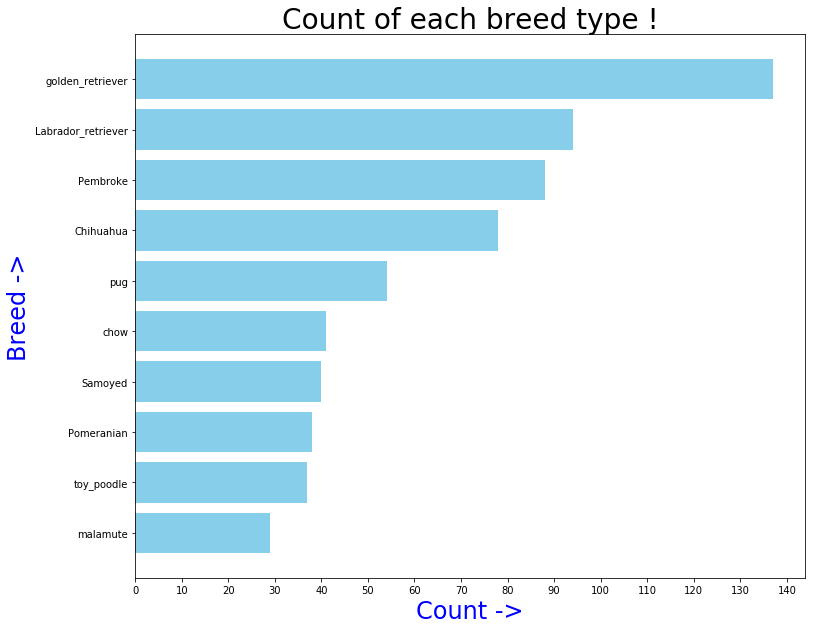

In [422]:
#setting the figure size 
plt.subplots(figsize=(12,10))
#plotting the graph
plt.barh( insight_1.Breed_type , insight_1.Count  ,color='skyblue')
#setting the graph title
plt.title('Count of each breed type !',color='black', fontsize = 28)
#setting the x-label
plt.xlabel('Count ->',color='b', fontsize = 24)
#setting the y-label
plt.ylabel('Breed ->',color='b', fontsize = 24)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(0,150,10));

In [423]:
#assigning the parameters to be plotted in a variable
graph2=df_1.groupby('breed_name',as_index=False)['rating'].mean()

In [424]:
#confirming the changes
graph2.head()

,breed_name,rating
0,Afghan_hound,0.966667
1,Airedale,0.983333
2,American_Staffordshire_terrier,1.100000
3,Appenzeller,1.100000
4,Australian_terrier,1.150000


In [425]:
graph2.sort_values(['rating'],ascending=False,inplace=True)
#confirming the change
graph2=graph2.head(10)
graph2.sort_values(['rating'],ascending=True,inplace=True)

In [426]:
#confirming the changes
graph2

,breed_name,rating
76,briard,1.233333
52,Saluki,1.250000
48,Pomeranian,1.286842
58,Siberian_husky,1.325000
35,Labrador_retriever,1.393617
74,borzoi,1.462500
27,Great_Pyrenees,1.492857
66,West_Highland_white_terrier,1.564286
103,soft-coated_wheaten_terrier,2.670000
80,clumber,2.700000


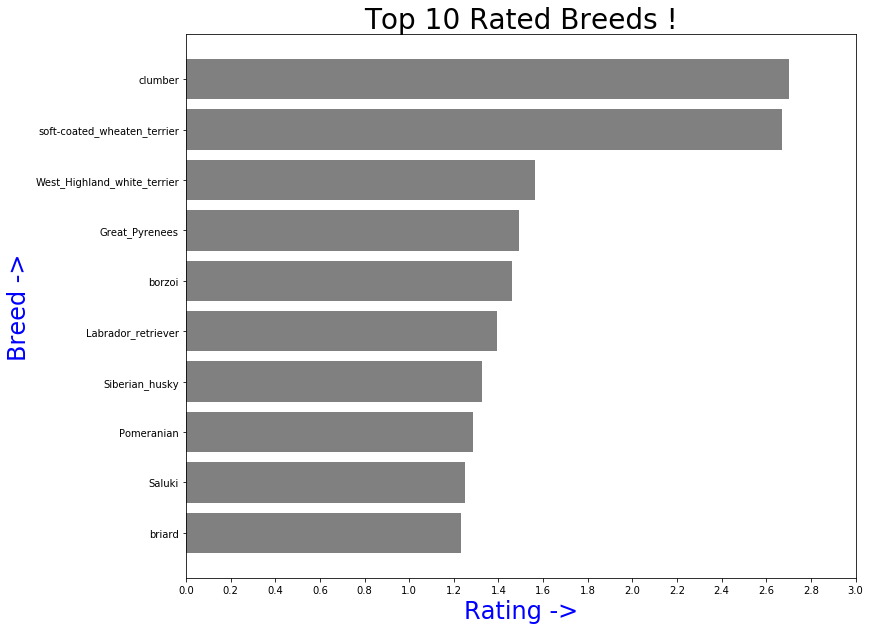

In [427]:
#setting the figure size 
plt.subplots(figsize=(12,10))
#plotting the graph
plt.barh( graph2.breed_name , graph2.rating  ,color='grey')
#setting the graph title
plt.title('Top 10 Rated Breeds !',color='black', fontsize = 28)
#setting the x-label
plt.xlabel('Rating ->',color='b', fontsize = 24)
#setting the y-label
plt.ylabel('Breed ->',color='b', fontsize = 24)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(0,3.2,0.2));

In [428]:
#assigning the parameters to be plotted in a variable
graph3=df_1.groupby('breed_name',as_index=False)['favorite_count'].mean()

In [429]:
graph3.sort_values(['favorite_count'],ascending=False,inplace=True)
#confirming the change
graph3=graph3.head(10)
graph3.sort_values(['favorite_count'],ascending=True,inplace=True)

In [430]:
#confirming the changes
graph3

,breed_name,favorite_count
13,Cardigan,14744.411765
19,English_springer,15131.111111
104,standard_poodle,15248.571429
32,Irish_water_spaniel,15778.333333
85,flat-coated_retriever,16220.625000
71,black-and-tan_coonhound,16419.000000
86,giant_schnauzer,16628.500000
0,Afghan_hound,16629.666667
22,French_bulldog,18391.600000
52,Saluki,23310.500000


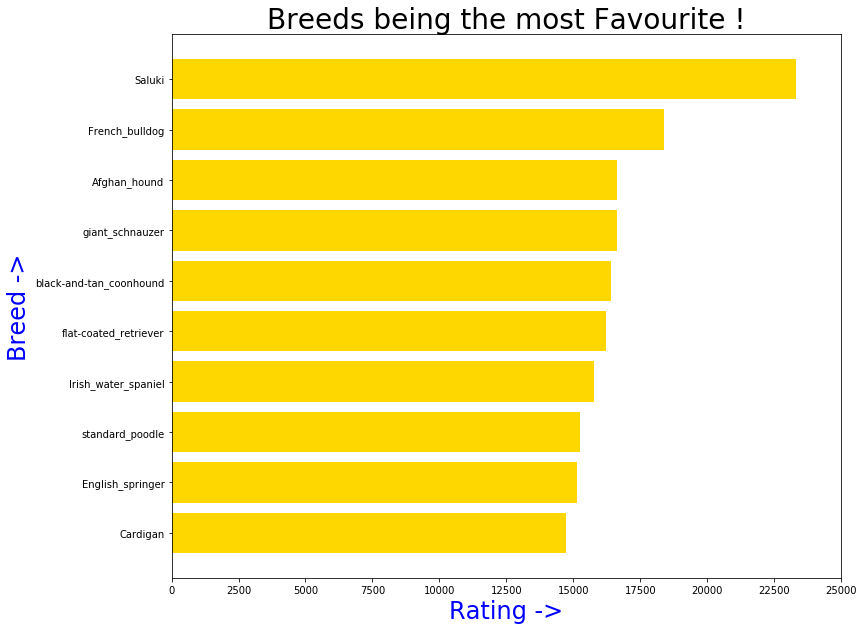

In [431]:
#setting the figure size 
plt.subplots(figsize=(12,10))
#plotting the graph
plt.barh( graph3.breed_name , graph3.favorite_count  ,color='gold')
#setting the graph title
plt.title('Breeds being the most Favourite !',color='black', fontsize = 28)
#setting the x-label
plt.xlabel('Rating ->',color='b', fontsize = 24)
#setting the y-label
plt.ylabel('Breed ->',color='b', fontsize = 24)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(0,27500,2500));

## Insight & Visualizations  -2

### In which months , most of the tweets are posted ??

In [432]:
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8366.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [433]:
df['timestamp'].dtype

dtype('O')

## After changing the datatype of the timestamp as datetime in the master dataset and then reading it again in df , it is rolling back to object. Dont know what the error is , but we need to change the datatype of timestamp for further analysis.

In [434]:
#changing the datatype
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [435]:
df_2=df

In [436]:
#extracting the month from datetime variables
df_2['release_month'] = df_2['timestamp'].dt.month

In [437]:
#confirming the changes
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,release_month
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8366.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8


In [438]:
#derving the year
df_2['release_year'] = df_2['timestamp'].dt.year

In [439]:
#confirming the changes
df_2['release_month'].head()

0    8
1    1
2    1
3    1
4    1
Name: release_month, dtype: int64

In [440]:
#confirming the changes
df_2['release_year'].head()

0    2017
1    2016
2    2016
3    2016
4    2016
Name: release_year, dtype: int64

In [441]:
#creating a duplicate for future reference
df_2['release_month_num'] = df_2['release_month']

In [442]:
#converting it to strings
df_2['release_month'] = df_2['release_month'].astype(str)

In [443]:
#confirming if done !!
df_2['release_month'].dtype

dtype('O')

In [444]:
#Converting the month values to more user readable data !!
df_2['release_month']=df_2['release_month'].str.replace('12','December')
df_2['release_month']=df_2['release_month'].str.replace('11','November')
df_2['release_month']=df_2['release_month'].str.replace('10','October')
df_2['release_month']=df_2['release_month'].str.replace('9','September')
df_2['release_month']=df_2['release_month'].str.replace('8','August')
df_2['release_month']=df_2['release_month'].str.replace('7','July')
df_2['release_month']=df_2['release_month'].str.replace('6','June')
df_2['release_month']=df_2['release_month'].str.replace('5','May')
df_2['release_month']=df_2['release_month'].str.replace('4','April')
df_2['release_month']=df_2['release_month'].str.replace('3','March')
df_2['release_month']=df_2['release_month'].str.replace('2','February')
df_2['release_month']=df_2['release_month'].str.replace('1','January')

### We have started replacing variable from 12 to 1 here,because if we start from 1 to 12 ,
### replacing 1 with january will replace 11 as januaryjanuary .

In [445]:
#confirming the changes 
df_2['release_month'].head(2)

0     August
1    January
Name: release_month, dtype: object

In [446]:
#checking if the applied formula is correct and we have got 12 unique values or not
df_2['release_month'].unique(),df_2['release_month'].nunique()

(array(['August', 'January', 'December', 'March', 'November', 'April',
        'February', 'October', 'September', 'May', 'June', 'July'],
       dtype=object), 12)

In [447]:
#using groupby to get the number of movies released in each month
graph3=df_2.groupby(['release_month_num','release_month'],as_index=False)['tweet_id'].count()
#sorting them in the month order
graph3.sort_values('release_month_num')
#dropping the 'release_month_num' column as it is of no use now !.
graph3.drop(['release_month_num'],axis=1, inplace=True)


In [448]:
#renaming the column to a more understandble name
graph3.rename(columns={'release_month':'Month','tweet_id':'No_Of_Tweets'},inplace=True)
#displaying the final dataframe
graph3

,Month,No_Of_Tweets
0,January,232
1,February,172
2,March,165
3,April,94
4,May,98
5,June,123
6,July,137
7,August,61
8,September,63
9,October,65


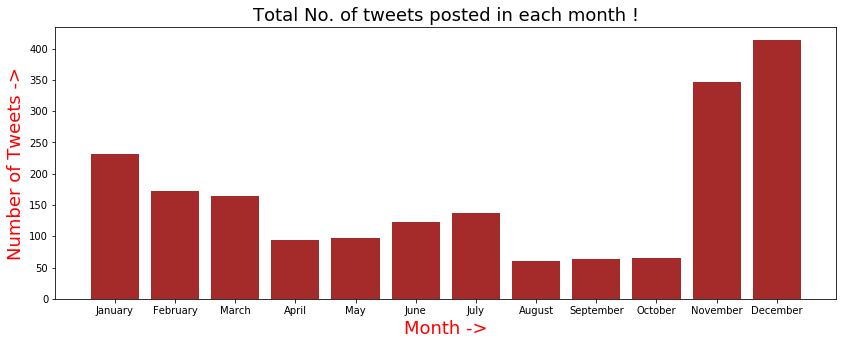

In [449]:
#setting the figure size 
plt.subplots(figsize=(14, 5))
#plotting the graph
plt.bar( graph3.Month , graph3.No_Of_Tweets ,color='brown')
#setting the graph title
plt.title('Total No. of tweets posted in each month !',color='black', fontsize = 18)
#setting the x-label
plt.xlabel('Month ->',color='r', fontsize = 18)
#setting the y-label
plt.ylabel('Number of Tweets ->',color='r', fontsize = 18);

### Thus, we can see that most of the tweets are posted in the time period of November to March !

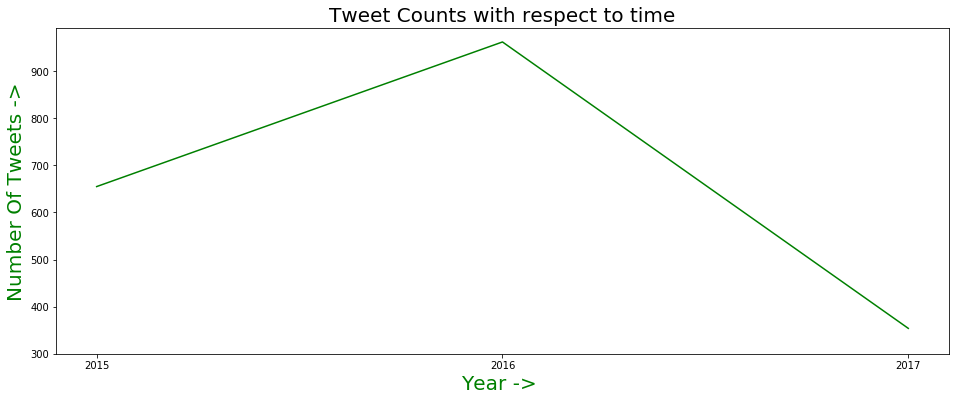

In [450]:
#assigning the parameters to be plotted in a variable
graph4=df_2.groupby('release_year')['tweet_id'].count()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph4.plot(color='green')
#setting the x-label
plt.xlabel('Year -> ',color='green', fontsize = 20)
#setting the y-label
plt.ylabel('Number Of Tweets ->',color='green', fontsize = 20)
#setting the graph title
plt.title('Tweet Counts with respect to time',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(2015,2018,1))
plt.yticks(np.arange(300,1000,100));

### It seems that the twitter page is getting famous with time, Since we dont have the complete data of 2017 , so we can ignore that trend , But as compared to 2015, there is a huge increase in the number of tweets in 2016.

## Insight & Visualizations  -3

### What are the most common dog names ??

In [451]:
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,release_month,release_year,release_month_num
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8366.0,...,False,bagel,0.085851,False,banana,0.07611,False,August,2017,8


In [452]:
df_3=df

In [453]:
#assigning the parameters to be plotted in a variable
graph5=df_3.groupby('name',as_index=False)['tweet_id'].count()

In [454]:
#renaming the column to a more understandble name
graph5.rename(columns={'name':'Dog_name','tweet_id':'No_Of_Tweets'},inplace=True)
graph5.head()

,Dog_name,No_Of_Tweets
0,Abby,2
1,Ace,1
2,Acro,1
3,Adele,1
4,Aiden,1


In [455]:
graph5.sort_values(['No_Of_Tweets'],ascending=False,inplace=True)
#confirming the change
graph5=graph5.head(10)
graph5.sort_values(['No_Of_Tweets'],ascending=True,inplace=True)

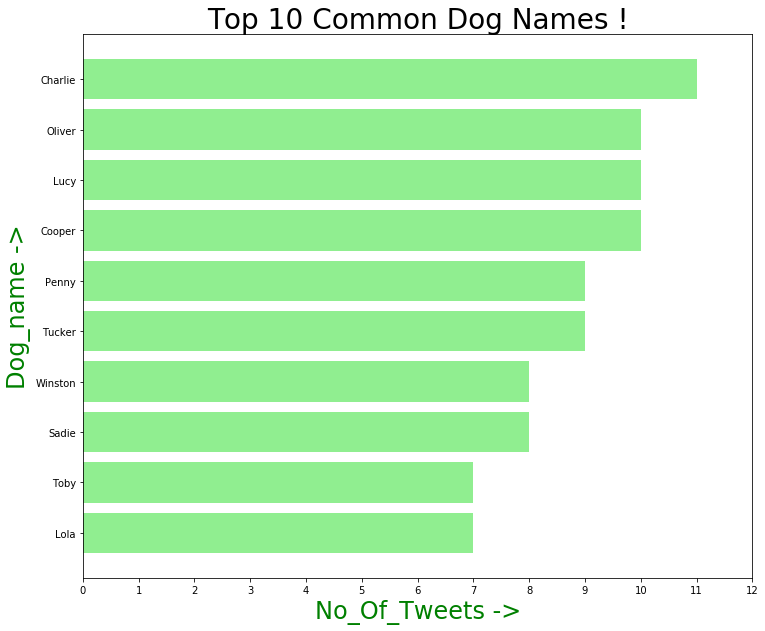

In [456]:
#setting the figure size 
plt.subplots(figsize=(12,10))
#plotting the graph
plt.barh( graph5.Dog_name , graph5.No_Of_Tweets  ,color='lightgreen')
#setting the graph title
plt.title('Top 10 Common Dog Names !',color='black', fontsize = 28)
#setting the x-label
plt.xlabel('No_Of_Tweets ->',color='green', fontsize = 24)
#setting the y-label
plt.ylabel('Dog_name ->',color='green', fontsize = 24)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(0,13,1));

## Insight & Visualizations  -4

### Top 5 favourite Dogs:- 

In [457]:
df_4=df

In [458]:
df_4.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,release_month,release_year,release_month_num
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8366.0,...,False,bagel,0.085851,False,banana,0.07611,False,August,2017,8


In [459]:
#sorting the dataframe with respect to the favourite_count
df_4=df_4.sort_values('favorite_count',ascending=False)

In [460]:
#selecting only the top 5
df_4=df_4.head(5)

In [461]:
#confirming the changes
df_4

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,release_month,release_year,release_month_num
1708,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,doggo,84046.0,...,True,ice_bear,0.044681,False,whippet,0.018442,True,June,2016,6
1965,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,puppo,47953.0,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,January,2017,1
967,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,NaN,61270.0,...,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,December,2016,12
1762,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,pupper,35617.0,...,True,Boston_bull,0.078060,True,pug,0.001771,True,May,2017,5
1709,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,NaN,doggo,62275.0,...,True,Siberian_husky,0.390413,True,malamute,0.080901,True,June,2016,6


In [462]:
#removing the unwanted columns
df_4.drop(['tweet_id','img_num','p1_conf','timestamp','p1','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','release_month','release_year','release_month_num'], axis=1, inplace = True)

In [463]:
#confirming the changes
df_4

,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url
1708,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,doggo,84046.0,164875.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...
1965,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,puppo,47953.0,140952.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
967,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,NaN,61270.0,127552.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...
1762,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,pupper,35617.0,122413.0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
1709,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,NaN,doggo,62275.0,121883.0,https://pbs.twimg.com/ext_tw_video_thumb/73923...


In [464]:
#printing the main info of the top 5 favourite dogs
for i in range(0,5):
    print('Favourite Dog '+str(i+1)+" :")
    print(df_4['text'].iloc[i])
    print(df_4['jpg_url'].iloc[i])
    print('\n')

Favourite Dog 1 :
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


Favourite Dog 2 :
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


Favourite Dog 3 :
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg


Favourite Dog 4 :
This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr
https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg


Favourite Dog 5 :
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
https://pbs.twimg.com/ext_tw_video_thumb/73923

## Favourite Dog 1 :
### Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
![](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

## Favourite Dog 2 :
### Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
![](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

## Favourite Dog 3 :
### This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
![](https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg)


## Favourite Dog 4 :
### This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr
![](https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg)

## Favourite Dog 5 :
### Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
![](https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg)

## Insight & Visualizations  -5

### Is there any correlation between any of the variables ?

In [465]:
df_5=df

In [466]:
#remving the unwanted columns
df_5.drop(['tweet_id','img_num','p1_conf','timestamp','p1','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','release_month','release_year','release_month_num'], axis=1, inplace = True)

In [467]:
#deriving the rating
df_5['rating']=df_5['rating_numerator']/df_5['rating_denominator']

In [468]:
#remving the unwanted columns
df_5.drop(['rating_numerator','rating_denominator'], axis=1, inplace = True)

In [469]:
#removing the records with null values
df_5=df_5.dropna(subset=['rating'])

In [470]:
#defining the co-relation table
corr_values=df_5.corr()
corr_values

,retweet_count,favorite_count,rating
retweet_count,1.000000,0.929849,0.018884
favorite_count,0.929849,1.000000,0.016743
rating,0.018884,0.016743,1.000000


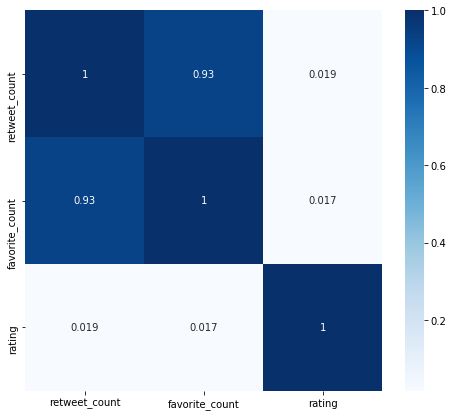

In [471]:
#potting the heatmap with the co-relation values
plt.subplots(figsize=(8,7))
sns.heatmap(corr_values, cmap="Blues",annot=True);

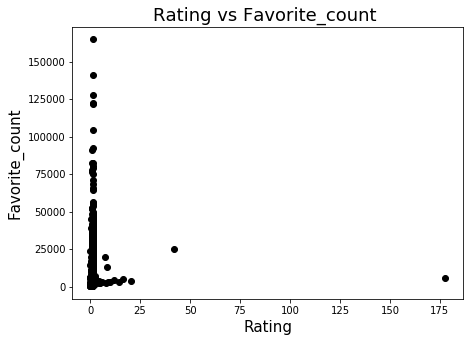

In [472]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=df_5['rating'], y=df_5['favorite_count'],color='black')
#setting the x-label
plt.xlabel('Rating',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Favorite_count',color='black', fontsize = 15)
#setting the graph title
plt.title('Rating vs Favorite_count ', fontsize = 18);

### There is no relation of rating with favorite_count and Retweet_count

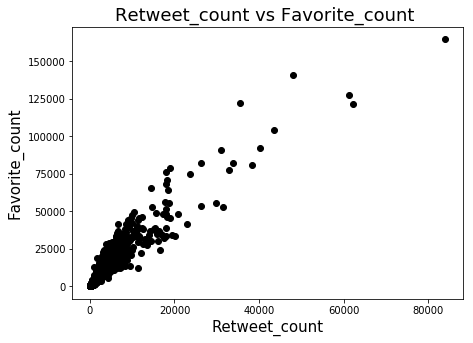

In [473]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=df_5['retweet_count'], y=df_5['favorite_count'],color='black')
#setting the x-label
plt.xlabel('Retweet_count',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Favorite_count',color='black', fontsize = 15)
#setting the graph title
plt.title('Retweet_count vs Favorite_count ', fontsize = 18);

### Favorite_count and Retweet_count are highly co-related with each other.